# Math 266 Python Exercise 3. Ordinary Least Squares

Simple linear regression involves finding a linear equation or linear regression model with a single independent variable and a single dependent variable. The parameters of the model are "learned" by using oberved data. Afterward the model can be used to predict outputs given new data. We will begin our activity by looking at examples of  ordinary linear regression.

Instructions:  Read and execute the cells below and follow the instructions.

Execute the cell below to load necessary modules

In [1]:
! pip install wget
import numpy as np
import numpy.linalg as la
import wget
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm
import seaborn as sns
sns.set()

<h2><span style="color:blue">Load the data for our first model. </span></h2>


In [2]:
file = wget.download("https://github.com/rmartin977/Math-266/blob/main/data_1.npy?raw=true")
data_1 = np.load(file)

<h2><span style="color:blue">View the data </span></h2>
The data consist of 10 (x,y) pairs.

In [3]:
data_1

array([[2.5, 3.4],
       [0.5, 1.7],
       [2.2, 3.9],
       [1.9, 3.2],
       [3.1, 4. ],
       [2.3, 3.7],
       [2. , 2.6],
       [1. , 2.1],
       [1.5, 2.6],
       [1.1, 1.9]])

## Extract the x and y vectors from the data matrix and plot the data

Text(0, 0.5, 'y')

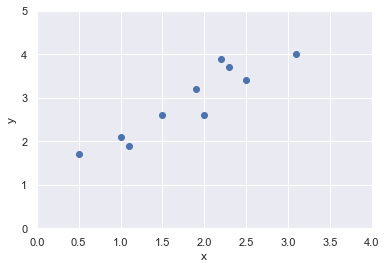

In [4]:
x = data_1[:,0]
y = data_1[:,1]
plt.scatter(x,y)
plt.xlim([0,4])
plt.ylim([0,5])
plt.grid
plt.xlabel("x")
plt.ylabel("y")

The linear regression model is shown below.  $X$ is the design matrix. The rows of $X$ are our inputs or "feature vectors". $\vec{\mathbf{\beta}}$ is the parameter vector, what we are solving for. $\vec{\mathbf{y}}$ is the observation vector containing the labels for each input

\begin{align}
X  \vec{\mathbf{\beta}}  = \vec{\mathbf{y}}   \\  
\end{align}

We will solve by using the standard normal equations used in least squares.

\begin{align}
\vec{\mathbf{\beta}}  =   (X^T X)^{-1} X^T  \vec{\mathbf{y}} \\   
\end{align}

<h2><span style="color:blue">Construct design matrix. </span></h2>


In [5]:
X = np.c_[np.ones_like(x),x]
X

array([[1. , 2.5],
       [1. , 0.5],
       [1. , 2.2],
       [1. , 1.9],
       [1. , 3.1],
       [1. , 2.3],
       [1. , 2. ],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 1.1]])

<h2><span style="color:blue">Solve system. </span></h2>


In [6]:
beta_1 = la.inv(X.T@X)@X.T@y
beta_1

array([1.10326185, 0.99819787])

<h2><span style="color:blue">Plot resulting least square line. </span></h2>


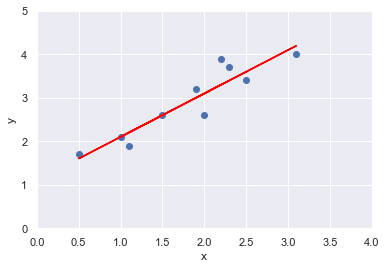

In [7]:
x = data_1[:,0]
y = data_1[:,1]
plt.scatter(x,y)
plt.xlim([0,4])
plt.ylim([0,5])
plt.grid
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x,beta_1[0] + beta_1[1]*x,c='red')

## For an input of 3.0 the model predicts and output of 4.1.


In [8]:
y_predict = beta_1[0] + beta_1[1]*3.0
y_predict.round(2)

4.1

<h2><span style="color:blue">Load the data for our second model. </span></h2>


In [9]:
file2 = wget.download("https://github.com/rmartin977/Math-266/blob/main/data_2.npy?raw=true")
data_2 = np.load(file2)

In [10]:
data_2

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

## Now build a linear model for this second data set by repeating the above steps.  No need to graph the data.  Use your model to predict the output when the input is 3.0.

In [11]:
# your code here

# Multiple Regression.

A multiple regression model is one that attempts to predict a dependent variable  based on the value of multiple independent variables. Below  we will attempt to predict the selling price of a house based on the number of bedrooms and square footage of the house. This is an example of two independent variables. 

<h2><span style="color:blue">Load the housing data. </span></h2>


In [12]:
file3 = wget.download("https://github.com/rmartin977/Math-266/blob/main/housing_data.npy?raw=true")                  
data_3 = np.load(file3)

In [13]:
data_3.shape  # there are 46 data points in this set

(46, 3)

In [14]:
data_3[:5] # view the first 5 rows

array([[  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900],
       [  1985,      4, 299900]])

## Above we see the first house is 1600 sqr ft., 3 bedrooms and sold for $329,900.00

The first house has a feature vector = $\begin{bmatrix}1600  \\3  \end{bmatrix}$. Our model has the form: $$y =\beta_0 + \beta_1x_1+\beta_2x_2 $$



## We follow the steps above to construct a model for this data.
1. Construct design Matrix X.
2. Use normal equations to solve for  the paramter vector $\vec{\mathbf{\beta}} =\begin{bmatrix}\beta_0  \\ \beta_1 \\ \beta_2 \end{bmatrix}$


In [15]:
X = np.c_[np.ones(46),data_3[:,:2]]  # design matrix
y = data_3[:,2]

In [16]:
beta_3 = la.inv(X.T@X)@X.T@y
beta_3

array([87807.75019324,   138.75587842, -8186.38287595])

## Predict the price of a house with 3000 sq ft and 3 bedrooms.  The answer is $479,516.


In [29]:
y_predict=beta_3[0]+ beta_3[1]*3000 + beta_3[2]*3
y_predict.round(2)

479516.24

# Multivariate Regression

In this section we develop a least squares model that will classify handwritten digits. The digits are strored in a 28X28 matrix.

Multivariate or multi target regression is the term used when there are multiple dependent variables or outputs. For this exercise the set of dependent variables is the set of 784 pixel values for a digital image of a digit. There are 10 target variables, namely the 10 digits. As the target variables are categorical (is the image digit a given digit value, yes or no) we are performing multi-target classification here. First some background.

Images can be represented by matrices.

![digit](https://github.com/rmartin977/Math-266/blob/main/digit.gif?raw=true)
(Source: [Adam Geitgey
](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721))

## Above we see a handwritten image of the digtit 8 stored in a 28X28 matrix.

# Load in the data.
The cell below could take a moment to complete execution.

In [18]:
training_df = pd.read_csv('https://github.com/rmartin977/Math-266/blob/main/mnist_train.csv.gz?raw=true',header = None,compression='gzip')
training_data = training_df.values

In [19]:
training_data.shape 

(60000, 785)

We see above that training_data is a 60,000 x 785 matrix.  Each row has 784 pixel values for the image and one value for the label.  The labels are stored in the first entry of each row.  We unpack this data below.

In [20]:
# unpack the training images and symbols
X , labels = (training_data[:,1:],training_data[:,0])
(X.shape,labels.shape)

((60000, 784), (60000,))

From above we see the matrix "X" contains 60,000 images of (784 = 28 x 28) pixels. The array, "labels" contains the 60,000 labels or target values for each image.</br>
Let us display the digit corresponding row 5 in X.

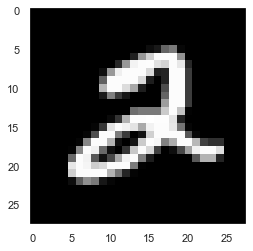

In [21]:
digit = X[5].reshape(28,28)
plt.imshow(digit,cmap='gray')
plt.grid()

In [22]:
labels[5]  # Looking a the label we see it agrees with the image

2

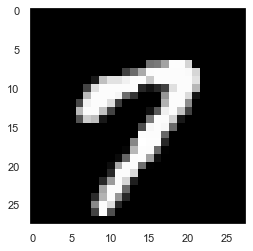

In [27]:
digit = X[15].reshape(28,28)  # row 15 stores the image for digit 7
plt.imshow(digit,cmap='gray')
plt.grid()

In [25]:
labels[30]

3

To be cotinued.........

## Your turn...
Answer the following 4 questions.  Go to gradescope Lecture #9 and enter your answers.

1. What output does the second model give with an input of 3.0?
2. Use our housing mode to predict the price of a 4000 sqr ft house with 4 bedrooms.
3. What digit is stored in row 30 of our digit matrix X?
4. We note that each house has 2 features.  How many features does each digit have?
